## K Means Clustering

Clustering is a technique for finding similarity groups in a data, called clusters. It attempts to group points in your dataset together by similarity. Clustering is considered an unsupervised learning, since you don’t have prescribed labels in the data and no class values denoting a priori grouping of the data instances are given. Today we'll try running one of the most famous clustering algorithms — K-means — on a test dataset.

To run a k-means algorithm, you have to randomly initialize points called the cluster centroids. 

There are two steps to K-means: cluster assignment and centroid update. In the former step, the algorithm goes through each of the data points
and assigns each one to the cluster with the closest centroid. The latter step moves the centroids to the average of the points within the cluster it represents. We do this until there is no change in the clusters (or possibly until some other stopping condition is met).

Lets try out the sklearn implementation of kmeans. First we'll import libraries and the dataset we'll be looking at today. 

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from IPython.display import display
 
import pandas as pd
import numpy as np
 
%matplotlib inline

# We'll use the iris dataset, a small real world dataset that comes with sklearn
iris = datasets.load_iris()

# We'll store these input values as a Pandas Dataframe
x = pd.DataFrame(iris.data)

Now try visualizing iris by printing things out.  Notice that our array in iris.data has four columns.

In [5]:
# Using the Pandas Dataframe we made in the previous step, set the column names to their proper values.
x.columns = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]
display(x)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
# now that our inputs are all set, we'll store the target values as a Pandas Dataframe too
y = pd.DataFrame(iris.target)
y.columns = ["Species"]
display(y)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Note that while we have class labels for the dataset, the key distinction that makes the clustering method unsupervised is that we aren't training on these labels - instead of trying to construct a function from the feature space to the label space, we are trying to find statistical structure within our feature space. The labels are only used in this example to compare the clusters we find to the actual classes to show the power of the clustering method. 

Now we can plot our data

Text(0.5,1,'Petal')

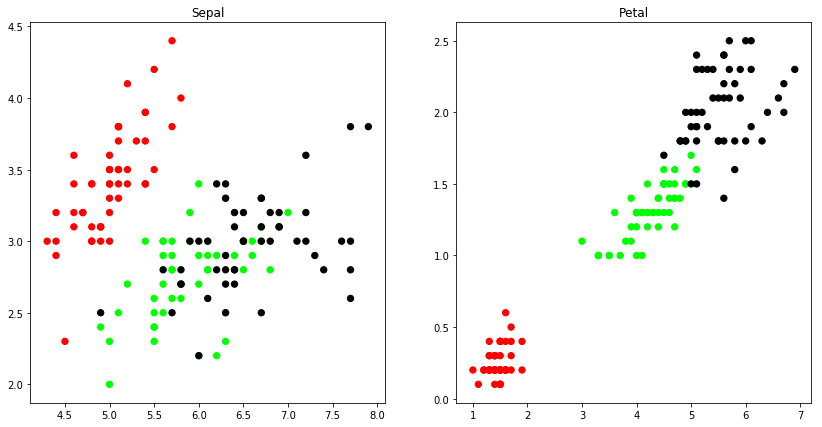

In [7]:
# First, set the plot's size
plt.figure(figsize=(14,7))

# Make a colormap
colormap = np.array(['red', 'lime', 'black'])
  
# now lets plot Sepal values
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c=colormap[y['Species']], s=40)
plt.title('Sepal')

# do the same thing for Petal values
plt.subplot(1, 2, 2)
plt.scatter(x['Petal.Length'], x['Petal.Width'], c=colormap[y['Species']], s=40)
plt.title('Petal')

Now that we've visualized the data, let's try clustering it

In [8]:
# fill in parameters for sklearn kmeans function
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now we can view the results of kmeans. This is what it decided for each point. So basically it assigns each point a number: 0, 1, or 2, depending on which cluster it goes under

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Lets plot the real classes against the predicted classes our model.

Text(0.5,1,'K Mean')

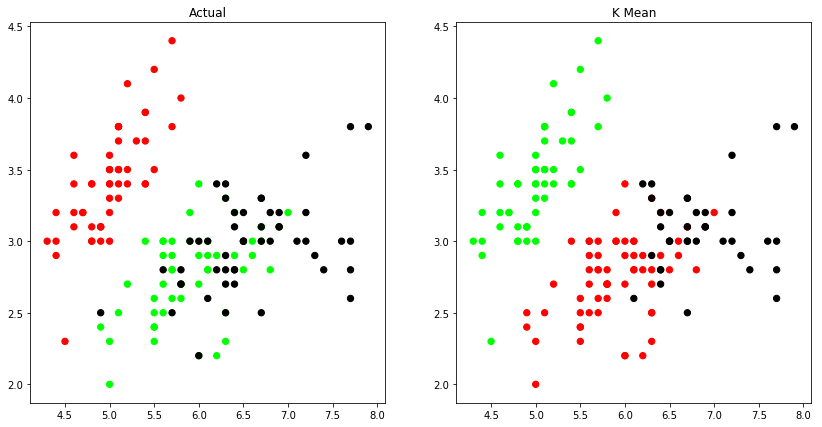

In [10]:
# Here we are plotting the Petal Length and Width
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Original
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c=colormap[y['Species']], s=40)
plt.title('Actual')
 
# Plot Models
plt.subplot(1, 2, 2)
plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c=colormap[model.labels_], s=40)
plt.title('K Mean')

Wait a second! The colors don't match up.  The green points in our KMeans don't correspond to the green points in the actual classification, so the data isn't assigned the proper value.  To fix it, we convert all the 1s to 0s and all the 0s to 1s.

In [11]:
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Let's plot the data and see if we labeled things correctly now

Text(0.5,1,'K Mean')

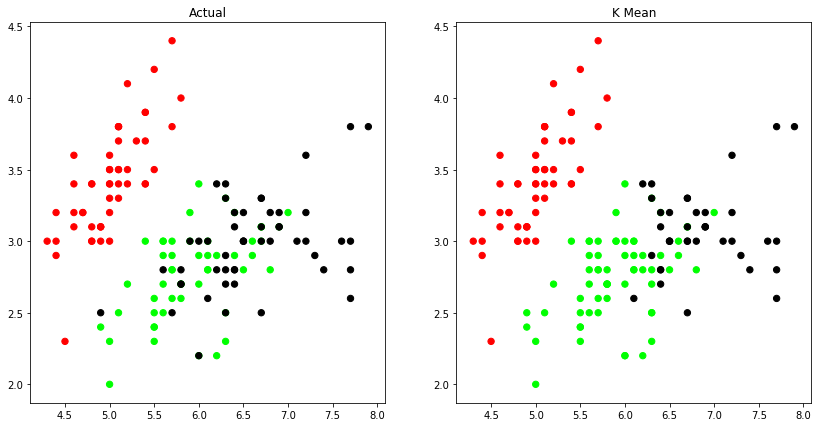

In [12]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
    
# Plot Actual
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c=colormap[y['Species']], s=40)
plt.title('Actual')
 
# Plot Fixed Prediction
plt.subplot(1, 2, 2)
plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c=colormap[predY], s=40)
plt.title('K Mean')

In [13]:
# Now let's see how well we did
sm.accuracy_score(y, predY)

0.8933333333333333